# Problem 1 - Least Squares in general

## The small problem (a)

In [1]:
using JuMP, GLPK

model = Model(GLPK.Optimizer)

@variable(model, x[1:4])
@variable(model, r[1:5] >= 0)

@constraint(model, r[1] >=  x[1] + x[2] + x[3] + x[4] - 3)
@constraint(model, r[1] >= -x[1] - x[2] - x[3] - x[4] + 3)

@constraint(model, r[2] >=  2x[1] - x[4] - 1)
@constraint(model, r[2] >= -2x[1] + x[4] + 1)

@constraint(model, r[3] >= -3x[2] + x[3])
@constraint(model, r[3] >=  3x[2] - x[3])

@constraint(model, r[4] >=  x[1] - x[2] - x[4] + 1)
@constraint(model, r[4] >= -x[1] + x[2] + x[4] - 1)

@constraint(model, r[5] >=  2x[3] + 3x[4] - 6)
@constraint(model, r[5] >= -2x[3] - 3x[4] + 6)

@objective(model, Min, sum(r))

optimize!(model)

x_opt = value.(x)
total_residual = objective_value(model)

println("Optimal x values: ", x_opt)
println("Minimum total residual: ", total_residual)

Optimal x values: [2.0, -0.5, -1.5, 3.0]
Minimum total residual: 0.5000000000000001


## The small problem (b)

In [3]:
model = Model(GLPK.Optimizer)

@variable(model, x[1:4])
@variable(model, r[1:5] >= 0)
@variable(model, z >= 0)

@constraint(model, r[1] >=  x[1] + x[2] + x[3] + x[4] - 3)
@constraint(model, r[1] >= -x[1] - x[2] - x[3] - x[4] + 3)

@constraint(model, r[2] >=  2x[1] - x[4] - 1)
@constraint(model, r[2] >= -2x[1] + x[4] + 1)

@constraint(model, r[3] >= -3x[2] + x[3])
@constraint(model, r[3] >=  3x[2] - x[3])

@constraint(model, r[4] >=  x[1] - x[2] - x[4] + 1)
@constraint(model, r[4] >= -x[1] + x[2] + x[4] - 1)

@constraint(model, r[5] >=  2x[3] + 3x[4] - 6)
@constraint(model, r[5] >= -2x[3] - 3x[4] + 6)

@constraint(model, r[1] <= z)
@constraint(model, r[2] <= z)
@constraint(model, r[3] <= z)
@constraint(model, r[4] <= z)
@constraint(model, r[5] <= z)

@objective(model, Min, z)

optimize!(model)

x_opt = value.(x)
max_residual = value(z)

println("Optimal x values: ", x_opt)
println("Minimum max-residual: ", max_residual)

Optimal x values: [1.75, -0.25, -1.0, 2.75]
Minimum max-residual: 0.25000000000000006


## The big problem (c)

In [4]:
nr = 400
nc = 200

A = zeros(nr, nc) 
b = zeros(nr)

for i in 1:nr
    b[i] = rand(-75:75)
    for j in 1:nc
        A[i, j] = rand(-7:7) 
    end
end

In [5]:
# minimize the total residual

model_total = Model(GLPK.Optimizer)

# Define variables
@variable(model_total, x[1:nc])
@variable(model_total, r[1:nr] >= 0)

# Define constraints for residuals
for i in 1:nr
    @constraint(model_total, r[i] >= sum(A[i, j] * x[j] for j in 1:nc) - b[i])
    @constraint(model_total, r[i] >= -sum(A[i, j] * x[j] for j in 1:nc) + b[i])
end

# Define objective to minimize the total residual
@objective(model_total, Min, sum(r))

# Optimize the model
optimize!(model_total)

# Get results
x_opt_total = value.(x)
total_residual = objective_value(model_total)

# Display the results
println("Optimal x values for minimizing total residual: ", x_opt_total)
println("Minimum total residual: ", total_residual)

Optimal x values for minimizing total residual: [0.32440716936919384, 0.1052813756641625, -0.0999362704844537, 0.7880380357571034, 0.7687806964442835, 0.45711155706243584, -0.01648939614930505, -0.2107508638945653, -1.086461427938209, -0.22091367635393763, 0.7757729259843291, -0.8857973868866819, -0.3547111209348299, 0.011184724657070813, -0.15214467448454888, 0.1255528096664787, 0.588391431558206, -0.701703840910829, 1.2767342443956697, -0.471329407761456, 0.2220285570364266, 0.6852552544847093, -0.08265360297709, 0.3763407915525204, -1.2575820658771508, -1.0986039016938762, 1.1344957674547782, -0.1816814105615321, 1.8966165721921977, -0.17141590838852772, 0.07270097595317375, -0.39422078984265496, -0.059692335016556644, -0.08251604325650215, -0.4296031004518165, -0.6573506769208461, 0.6407055914791603, -0.6240396748758125, 1.175466151318213, -0.04714694574865014, 0.960561087745939, -0.13854228907128888, -0.1069254959383139, 0.32980204092358817, 1.1812825558622322, 0.3733709269892564,

## The big problem (d)

In [6]:
# minimizing the max residual

model_max = Model(GLPK.Optimizer)

# Define variables
@variable(model_max, x[1:nc])
@variable(model_max, r[1:nr] >= 0)
@variable(model_max, z >= 0)

# Define constraints for residuals
for i in 1:nr
    @constraint(model_max, r[i] >= sum(A[i, j] * x[j] for j in 1:nc) - b[i])
    @constraint(model_max, r[i] >= -sum(A[i, j] * x[j] for j in 1:nc) + b[i])
end

# Define constraints for maximum residual
for i in 1:nr
    @constraint(model_max, r[i] <= z)
end

# Define objective to minimize the maximum residual
@objective(model_max, Min, z)

# Optimize the model
optimize!(model_max)

# Get results
x_opt_max = value.(x)
max_residual = value(z)

# Display the results
println("Optimal x values for minimizing maximum residual: ", x_opt_max)
println("Minimum maximum residual: ", max_residual)

Optimal x values for minimizing maximum residual: [0.029624975705661367, 2.3348822144007526, 0.9733639869919533, 1.6040453688620653, 1.0961083822825615, -0.06345646186063014, -0.04091075705964504, -0.20981490702742636, -1.1753270837145793, -0.3959369378640414, 0.13663798815986963, -0.8800454201472688, -1.3437704480981696, -0.21808189672973016, -0.21908434206557037, -0.2054732739812817, -0.3951712886053013, 0.6288904254178935, 0.5166217995553628, 0.0944848559936575, -0.11882269173585121, 0.6018351333096295, -0.7738475671497931, 1.1364340281311958, -1.3055713084369263, -1.2648900701456276, -0.7475750821454903, 0.7255348301077753, 0.11682874024178785, 0.2700202299171605, -0.4827710543748534, -0.7244354680138801, -0.21617465619089227, -0.09730790381114482, -0.64206266607532, -0.718956622238314, 1.4137136588652728, 0.5789501905257961, -0.44014778289699896, 0.7793388618397888, 0.5399005620648052, -1.081916332367845, -0.76673528947744, -0.2891536304381089, -0.24271359104269688, -0.07533847409

# Problem 2 - Curve fitting

In [7]:
using Plots

## (a)

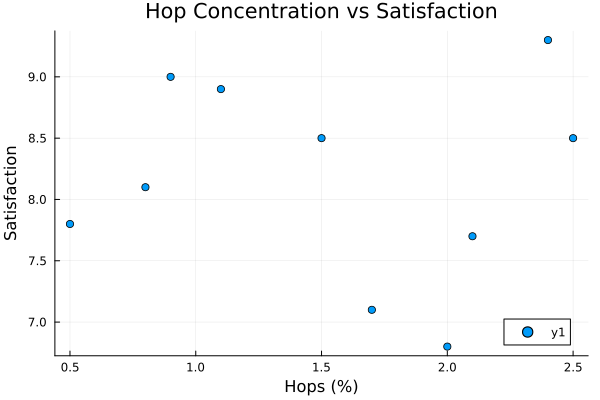

In [8]:
hops = [0.5, 0.8, 0.9, 1.1, 1.5, 1.7, 2.0, 2.1, 2.4, 2.5]
satisfaction = [7.8, 8.1, 9.0, 8.9, 8.5, 7.1, 6.8, 7.7, 9.3, 8.5]

plot(hops, satisfaction, seriestype = :scatter, xlabel = "Hops (%)", ylabel = "Satisfaction", title = "Hop Concentration vs Satisfaction")

## (b)

In [9]:
using Optim

# Define the function to fit
function custom_model(params, x)
    a, b, c, d = params
    return a * x .+ b * exp.(c * x) .+ c * sin.(x) .+ d
end

# Define the objective function (2-norm error)
function objective(params)
    return sum((satisfaction .- custom_model(params, hops)).^2)
end

# Initial guess for parameters
initial_params = [1.0, 1.0, 1.0, 1.0]

# Perform optimization
result = optimize(objective, initial_params, NelderMead())

# Extract the optimal parameters
optimal_params = Optim.minimizer(result)
println("Optimal parameters for the first model: ", optimal_params)

# Compute the 2-norm error
error = objective(optimal_params)
println("2-norm error for the first model: ", error)

Optimal parameters for the first model: [1.04588523487117, 4.662571288585265, -0.44194068817271737, 4.444006979716073]
2-norm error for the first model: 5.771212514650962


## (c)

In [10]:
# Define the polynomial function to fit
function polynomial_model(params, x)
    a1, a2, a3, a4 = params
    return a1 * x.^3 .+ a2 * x.^2 .+ a3 * x .+ a4
end

# Define the objective function (2-norm error)
function poly_objective(params)
    return sum((satisfaction .- polynomial_model(params, hops)).^2)
end

# Initial guess for parameters
poly_initial_params = [1.0, 1.0, 1.0, 1.0]

# Perform optimization
poly_result = optimize(poly_objective, poly_initial_params, NelderMead())

# Extract the optimal parameters
poly_optimal_params = Optim.minimizer(poly_result)
println("Optimal parameters for the polynomial model: ", poly_optimal_params)

# Compute the 2-norm error
poly_error = poly_objective(poly_optimal_params)
println("2-norm error for the polynomial model: ", poly_error)


Optimal parameters for the polynomial model: [2.8593624570873386, -12.45785813110275, 15.932574891318868, 2.4449346161573584]
2-norm error for the polynomial model: 2.4000170488399393


## (d)

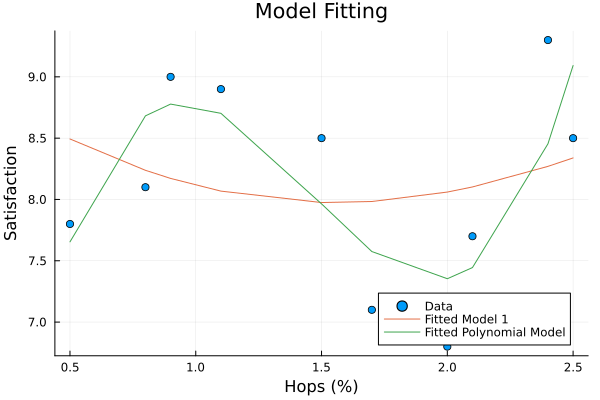

In [11]:
using Plots

# Generate data for the fitted models
fitted_custom_model = custom_model(optimal_params, hops)
fitted_polynomial_model = polynomial_model(poly_optimal_params, hops)

# Plot the data and the fitted models
plot(hops, satisfaction, seriestype = :scatter, label = "Data", xlabel = "Hops (%)", ylabel = "Satisfaction", title = "Model Fitting")
plot!(hops, fitted_custom_model, seriestype = :line, label = "Fitted Model 1")
plot!(hops, fitted_polynomial_model, seriestype = :line, label = "Fitted Polynomial Model")


# Problem 3 - Lots of Norms

## (a)

In [12]:
using JuMP
using GLPK

# Create a new model with the GLPK optimizer
model = Model(GLPK.Optimizer)

# Define variables
@variable(model, I)
@variable(model, P)
@variable(model, r[1:3] >= 0)

# Define constraints
@constraint(model, r[1] >= 2*I + 2*P - 5)
@constraint(model, r[1] >= -2*I - 2*P + 5)
@constraint(model, r[2] >= I + 3*P - 6)
@constraint(model, r[2] >= -I - 3*P + 6)
@constraint(model, r[3] >= 3*I - P - 4)
@constraint(model, r[3] >= -3*I + P + 4)

# Define objective to minimize the total absolute deviation
@objective(model, Min, sum(r))

# Optimize the model
optimize!(model)

# Get results
I_opt = value(I)
P_opt = value(P)
total_absolute_deviation = objective_value(model)

# Display the results
println("Optimal I: ", I_opt)
println("Optimal P: ", P_opt)
println("Total absolute deviation (1-norm): ", total_absolute_deviation)

Optimal I: 1.8
Optimal P: 1.4
Total absolute deviation (1-norm): 1.3999999999999995


## (b)

In [13]:
using JuMP
using Ipopt

# Create a new model with the Ipopt optimizer
model2 = Model(Ipopt.Optimizer)

# Define variables
@variable(model2, I)
@variable(model2, P)

# Define objective to minimize the 2-norm of the residuals
@objective(model2, Min, (2*I + 2*P - 5)^2 + (I + 3*P - 6)^2 + (3*I - P - 4)^2)

# Add final constraint
@constraint(model2, I + P == 3)

# Optimize the model
optimize!(model2)

# Get results
I_opt2 = value(I)
P_opt2 = value(P)
total_2norm = objective_value(model2)

# Display the results
println("Optimal I: ", I_opt2)
println("Optimal P: ", P_opt2)
println("Total 2-norm of the residuals: ", sqrt(total_2norm))

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.7000000e+01 3.00e+00 4.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

## (c)

In [14]:
using JuMP
using Ipopt

# Create a new model with the Ipopt optimizer
model3 = Model(Ipopt.Optimizer)

# Define variables
@variable(model3, I)
@variable(model3, P)
@variable(model3, r1)
@variable(model3, r2)
@variable(model3, r3)

# Define constraints for residuals
@constraint(model3, r1 == 2*I + 2*P - 5)
@constraint(model3, r2 == I + 3*P - 6)
@constraint(model3, r3 == 3*I - P - 4)

# Add the final constraint
@constraint(model3, I + P == 3)

# Define objective to minimize the 2-norm of the residuals
@objective(model3, Min, r1^2 + r2^2 + r3^2)

# Optimize the model
optimize!(model3)

# Get results
I_opt3 = value(I)
P_opt3 = value(P)
total_2norm_linear = sqrt(value(r1^2 + r2^2 + r3^2))

# Display the results
println("Optimal I: ", I_opt3)
println("Optimal P: ", P_opt3)
println("Total 2-norm of the residuals: ", total_2norm_linear)

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:       11
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 6.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 